# Notebook 3: Performance metric in machine learning

COSI/ECON-148B-1 : Introduction to Machine Learning with Economic Applications

Zizhang Chen

[zizhang2@brandeis.edu](mailto:zizhang2@brandeis.edu)

## 1. Overview

In machine learning, the evaluation metric is used to determine a model's performance on a given dataset. It helps to 

- Compare different models and select the one with the best performance.


- Tuning model parameters. 


- Tracking the progress of a model over time. 

## 2, Performance metric for classification 

##### 2.0 Accuracy

Measures the proportion of samples that were correctly classified by the algorithm.

##### 2.1 Confusion table

True Positive (TP) refers to the number of instances that are correctly classified as positive. In a binary classification problem, positive usually represents the class of interest. For example, in a disease diagnosis problem, a positive result means the patient has the disease.

False Positive (FP) refers to the number of instances that are incorrectly classified as positive. In other words, it is a type of error in which a negative instance is predicted as positive.

True Negative (TN) refers to the number of instances that are correctly classified as negative. In a binary classification problem, negative usually represents the class not of interest. For example, in a disease diagnosis problem, a negative result means the patient does not have the disease.

False Negative (FN) refers to the number of instances that are incorrectly classified as negative. It is a type of error in which a positive instance is predicted as negative.

![confusion_matrix.png](confusion_matrix.png)

![meme.jpg](meme.jpg)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
dataset = load_breast_cancer(as_frame=True)
X = dataset['data']
y = dataset['target'].values
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size=0.3, random_state=42)
train_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [2]:
clf = LogisticRegression(C = 10, solver = 'newton-cg').fit(train_X, train_y)
pred_y = clf.predict(test_X)

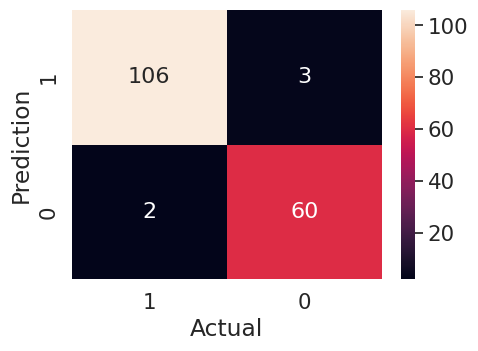

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4) # for label size
confusion_mat = confusion_matrix(test_y, pred_y)
df_cm = pd.DataFrame(confusion_mat[::-1].T[::-1], reversed(range(2)), reversed(range(2)))
plt.figure(figsize=(5,3.5))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [4]:
tn, fp, fn, tp = confusion_mat.ravel()
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

True positive: 106
True negative: 60
False positive: 3
False negative: 2


Simple illustration:

In [5]:
TP = np.sum((pred_y == 1) & (test_y == 1))
TN = np.sum((pred_y == 0) & (test_y == 0))
FP = np.sum((pred_y == 1) & (test_y == 0))
FN = np.sum((pred_y == 0) & (test_y == 1))
print('True positive:', TP)
print('True negative:', TN)
print('False positive:', FP)
print('False negative:', FN)


True positive: 106
True negative: 60
False positive: 3
False negative: 2


##### 2.2 Precision, Recall, Specificity,  


Precision, recall, sensitivity, and specificity are metrics used to evaluate the performance of binary classification algorithms.

   - **Precision** measures the proportion of positive predictions that are actually positive. It is calculated as the number of true positive predictions divided by the sum of true positive and false positive predictions. Precision answers the question **"Of all the positive predictions made by the classifier, what fraction of them are actually correct?"**
    
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

  

- **Recall**, also known as **sensitivity**, measures the proportion of positive samples that were correctly classified as positive. It is calculated as the number of true positive predictions divided by the sum of true positive and false negative predictions. Recall answers the question **"Of all the positive samples in the dataset, what fraction of them were correctly classified as positive by the classifier?"**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Specificity** measures the proportion of negative samples that were correctly classified as negative. It is calculated as the number of true negative predictions divided by the sum of true negative and false positive predictions. Specificity answers the question **"Of all the negative samples in the dataset, what fraction of them were correctly classified as negative by the classifier?"**

$$
\text{Specificity} = \frac{TN}{FP + TN}
$$

- **F1-score** is the harmonic mean of precision and recall. It is a commonly used metric to summarize the performance of a binary classifier, especially when precision and recall are both important. 

$$
\text{F1-score} = \frac{2 * Precision * Recall}{Precision * Recall}
$$

Note that precision, recall, sensitivity, specificity, and F1-score are all defined in the context of binary classification algorithms, where the goal is to predict one of two possible classes. For multiclass classification problems, these metrics can be calculated for each class and averaged across classes to obtain a single summary of the classifier's performance.


##### 3.3 ROC curve, AUC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It is a plot of the true positive rate against the false positive rate.

$$
f(x) > t
$$

$f$: trained classifier

$x$: a sample

$t$: threshold


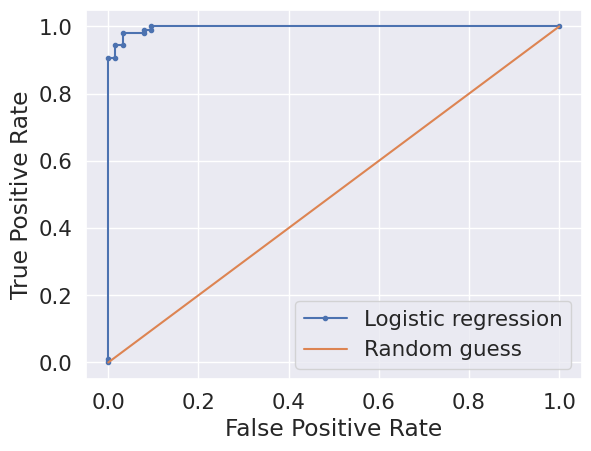

In [6]:
from sklearn import metrics
import scipy.stats as stats

y_pred_proba = clf.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
plt.plot(fpr,tpr, marker='.', label='Logistic regression')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Random guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

The **AUC** is the area under the ROC curve and summarizes the overall performance of the classifier. A higher AUC value indicates a better classifier, with a value of 1.0 representing a perfect classifier.

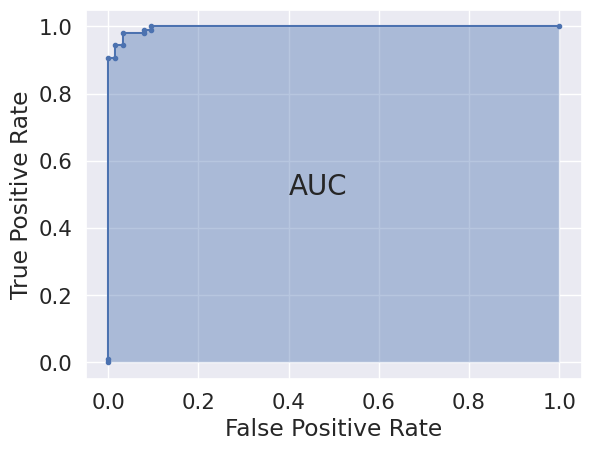

In [7]:
y_pred_proba = clf.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
plt.plot(fpr,tpr, marker='.', label='Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr,tpr, step="pre", alpha=0.4)
plt.text(0.4, 0.5, 'AUC', dict(size=20))
plt.show()

##### 2.4 Get a summary report

In [8]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, digits = 3))

              precision    recall  f1-score   support

           0      0.968     0.952     0.960        63
           1      0.972     0.981     0.977       108

    accuracy                          0.971       171
   macro avg      0.970     0.967     0.968       171
weighted avg      0.971     0.971     0.971       171



## 3, Performance metric for regression

##### 3.1 MSE, RMSE, MAE, 

- Mean Squared Error (MSE): The average squared difference between the predicted and actual values.


- Root Mean Squared Error (RMSE): The square root of Mean Squared Error.


- Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values.


In [9]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes['data'][:, np.newaxis, 2]
y = diabetes['target']
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size=0.1, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_X, train_y)
pred_y = lm.predict(test_X)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:', mean_squared_error(test_y, pred_y))

print('mean_squared_error:', mean_squared_error(test_y, pred_y, squared=False))

print('mean_absolute_error:', mean_absolute_error(test_y, pred_y))

mean_squared_error: 3835.4416422256345
mean_squared_error: 61.93094252654027
mean_absolute_error: 51.15098740760275


Simple verification

In [12]:
print('mean_squared_error:', np.mean((test_y - pred_y) ** 2))

print('mean_squared_error:', np.sqrt(np.mean((test_y - pred_y) ** 2)))

print('mean_absolute_error:', np.abs(np.mean((test_y - pred_y) ** 2)))

mean_squared_error: 3835.4416422256345
mean_squared_error: 61.93094252654027
mean_absolute_error: 3835.4416422256345


##### 3.2 $R^2$

- R-squared (Coefficient of Determination): A measure of how well the model fits the data, with a higher R-squared value indicating a better fit.

$$
R^{2} = 1 - \frac{\text{SSE}}{\text{SST}}
$$


SSE: (Sum of Squared Errors) is the sum of the squared differences between the **actual** and **predicted** values.

SST: (Total Sum of Squares) is the sum of the squared differences between the **actual** values and the **mean** of the actual values.

In [13]:
from sklearn.metrics import r2_score
print('R-square:', r2_score(test_y, pred_y))

R-square: 0.3729745940596795


A value of 1 indicates that the model perfectly fits the data, while a value of 0 indicates that the model does not explain any of the variation in the data.

## 4, Choice of performance metric

##### 4.1 Example 1

Consider fraud detection, for example. Say an action could be fraud or innocent.

1: Fraud

0: Innocent

TP: our model successfully detects fraud action. (loss 0 dollars)

TN: our model successfully detects innocent action. (loss 0 dollars)

FP: our model classifies the innocent action as fraud. (loss 10 dollars due to the effort to prove innocent for the innocent action)

FN: our model classifies the fraud innocent as innocent. (loss of 10000 dollar due to the financial loss)

In this case, it is crucial to minimize **false negatives**, as failing to detect a fraudulent transaction could have significant financial consequences. 


In this case, **recall** is the preferred metric than the precision, as it measures the proportion of actual positive instances that were correctly identified.

![fraud.jpg](fraud.jpg)

##### 4.2 Example 2

Consider filtering the spam email, for example. Say an email could be spam or common. (the loss of dollars is just for illustration, not because of the TA is greedy for money)

1: Spam

0: Common

TP: our model successfully detects Spam email. (loss 0 dollars)

TN: our model successfully detects Common email. (loss 0 dollars)

**FP**: our model classifies the Common email as Spam. (loss 100 dollars due to miss of some important information, like the cancellation of tomorrow's class)

FN: our model classifies the Spam email as Common. (loss 0.1 dollar since spam email looks annoying)

In this case, it is crucial to minimize **false positives**, as failing to detect a common email could miss some important information


In this case, **precision** is the preferred metric than the recall.

#### 4.3 Discussion: what about Medical Diagnosis?